## Convolutional Neural Network

This is implementation of Convolutional Neural Network for the purpose of classification `dog` and `cat`. The dataset contain the test_set and training_set. 1000 images are contained in each dog and cat category of the test_set. 4000 images are contained in each dog and cat category of training_set. We train the model training_set and use test_set as validation data. Then we predict on the custiom images in single_prediction path.

### Importing the libaries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.7.0'

## Part-1: Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
                'drive/MyDrive/Datasets/cnn-cat-dog/dataset/training_set',
                target_size=(64, 64),
                batch_size=32,
                class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
            'drive/MyDrive/Datasets/cnn-cat-dog/dataset/test_set',
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part-2: Building the CNN model

### Initialising the CNN

In [ ]:
model = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
model.add(tf.keras.layers.Flatten())

### Step 4 - Fully Connection

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part-3: Training the CNN model

### Compiling the CNN

In [ ]:
# Check GPU availability
print("GPU", "available (YESSS!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
250/250 [==============================] - 41s 163ms/step - loss: 0.1338 - accuracy: 0.9467 - val_loss: 0.7042 - val_accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 41s 162ms/step - loss: 0.1267 - accuracy: 0.9521 - val_loss: 0.7268 - val_accuracy: 0.8010
Epoch 3/100
250/250 [==============================] - 40s 161ms/step - loss: 0.1263 - accuracy: 0.9539 - val_loss: 0.7806 - val_accuracy: 0.7830
Epoch 4/100
250/250 [==============================] - 40s 159ms/step - loss: 0.1104 - accuracy: 0.9578 - val_loss: 0.8586 - val_accuracy: 0.7825
Epoch 5/100
250/250 [==============================] - 40s 158ms/step - loss: 0.1156 - accuracy: 0.9539 - val_loss: 0.8926 - val_accuracy: 0.7790
Epoch 6/100
250/250 [==============================] - 39s 157ms/step - loss: 0.1175 - accuracy: 0.9564 - val_loss: 0.7664 - val_accuracy: 0.7930
Epoch 7/100
250/250 [==============================] - 39s 158ms/step - loss: 0.1092 - accuracy: 0.9584 - val_loss: 0.7987 -

## Part-4: Making prediction

Let's make prediction on the images inside `drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/` path.

In [ ]:
import os
custom_path = "drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/dog.4012.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/dog.4002.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/dog.4039.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/dog.4184.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat.4003.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat.4079.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat.4159.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat.4146.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat_or_dog_1.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat_or_dog_2.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat_or_dog_3.jpg',
 'drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/cat_or_dog_4.jpg']

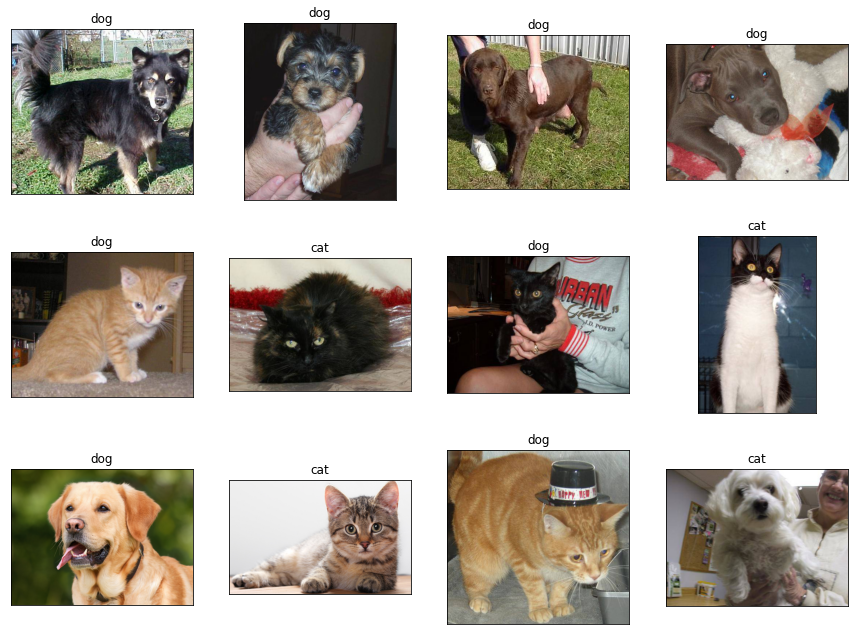

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
custom_path = "drive/MyDrive/Datasets/cnn-cat-dog/dataset/single_prediction/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
size = np.ceil(np.sqrt(len(custom_image_paths)))

plt.figure(figsize=(15, 15))
for i, image_path in enumerate(custom_image_paths):
  from keras.preprocessing import image
  test_image = image.load_img(image_path, target_size=(64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  result = model.predict(test_image)
  training_set.class_indices    # This check and print class indices like this {'cats': 0, 'dogs': 1}
  if result[0][0] == 1:
    prediction = 'dog'
  else:
    prediction = 'cat'

  plt.subplot(size, size, i+1)
  plt.xticks([]), plt.yticks([])
  plt.title(prediction)
  image = plt.imread(image_path)
  plt.imshow(image)